# QC in pseudobulked level

## Merging T cells
Merging T regulatory cells, T cells CD8+ and CD4+ into one cell type improves missingness and resulting DE values.

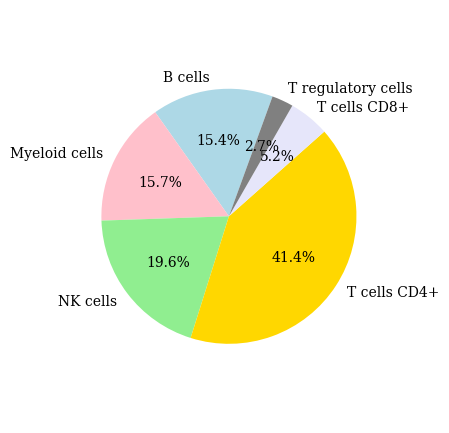

After pseudobulking, there are 30 to 50 percent of data is missing, depending on initial filtering on the single cell data. We can observe that for certain pseudobulked samples with low single cell counts, almost all of the genes are missing (ratio of close to 1).  

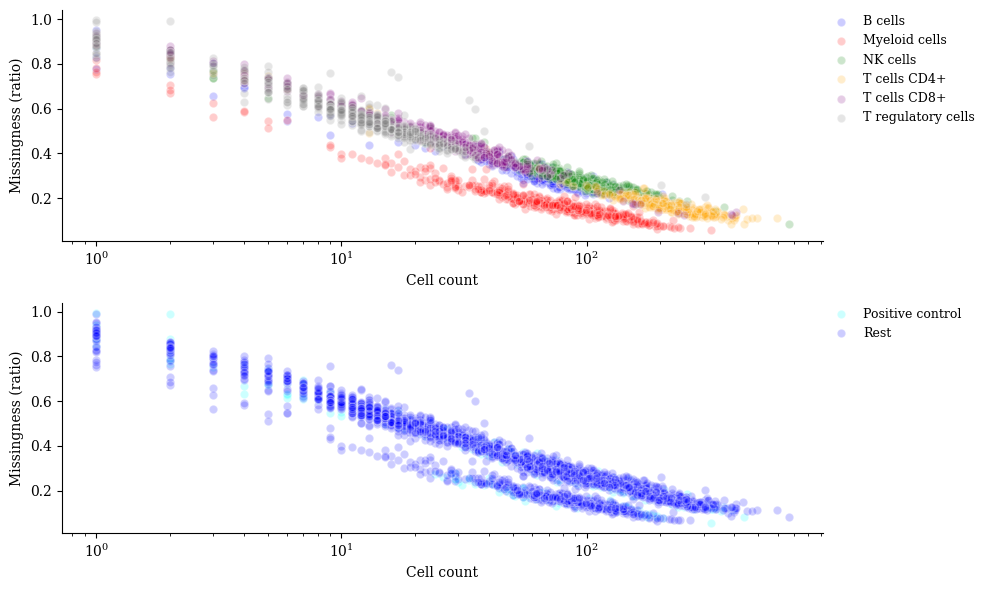

To see the impact of this, we evaluate DE data. We see that samples with low cell count (10 or below) show high proportion of positive DE values as well as high ratio of sig (0.05) genes. It should be noted that the graph below shows the sum of counts for all pseudobulked samples related to a (sm_name, cell_count) pair. Thus, we see a higher cell count for controls  

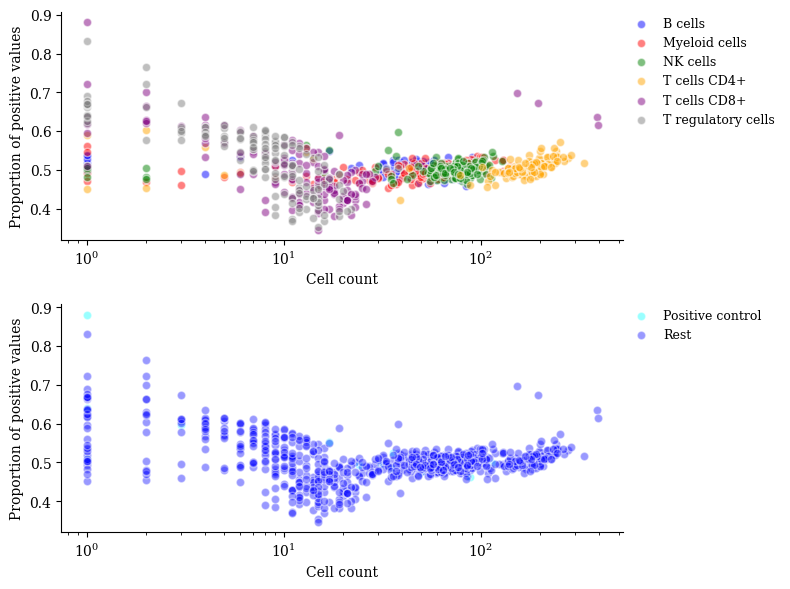

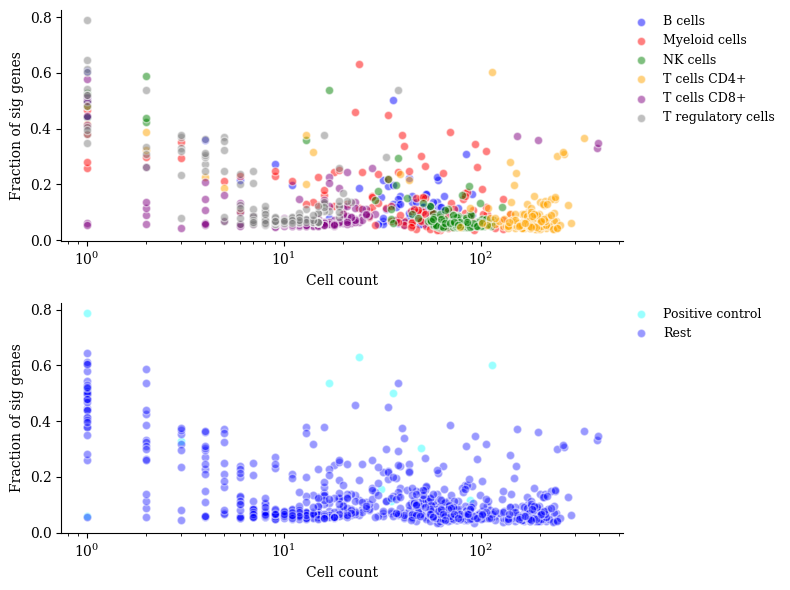

We see abnormaly high fraction of sig values and proportion of positive values for those with low cell count. We first aim to combine all T cells to improve the missingness and increae cell counts for pseudobulked samples. This already improves the DE results:

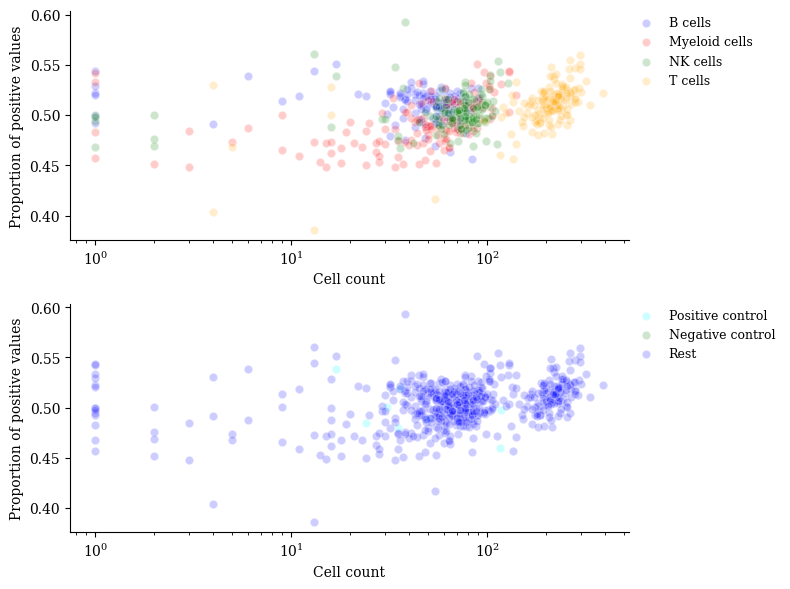
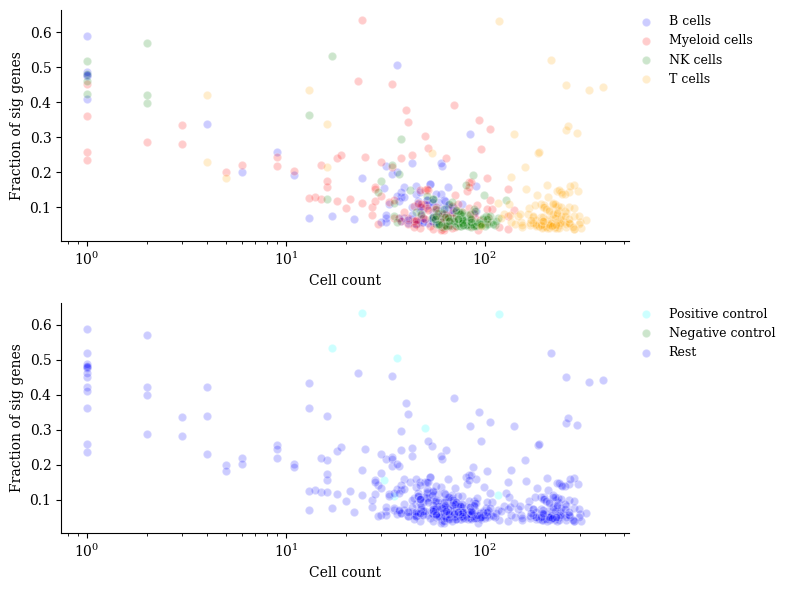

## Outlier compounds 
Next, we check compound specific distribution of cell counts. First, we show the distribution for control samples. 

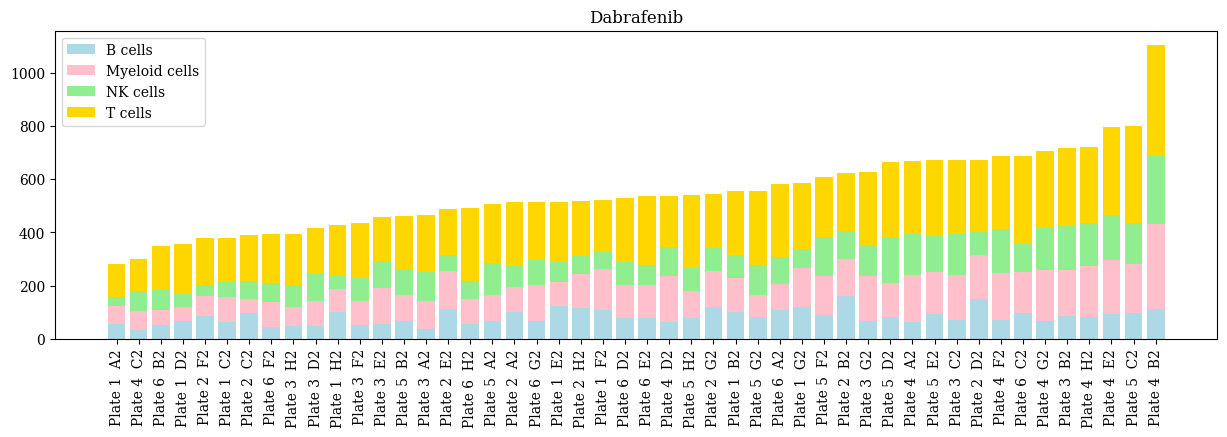
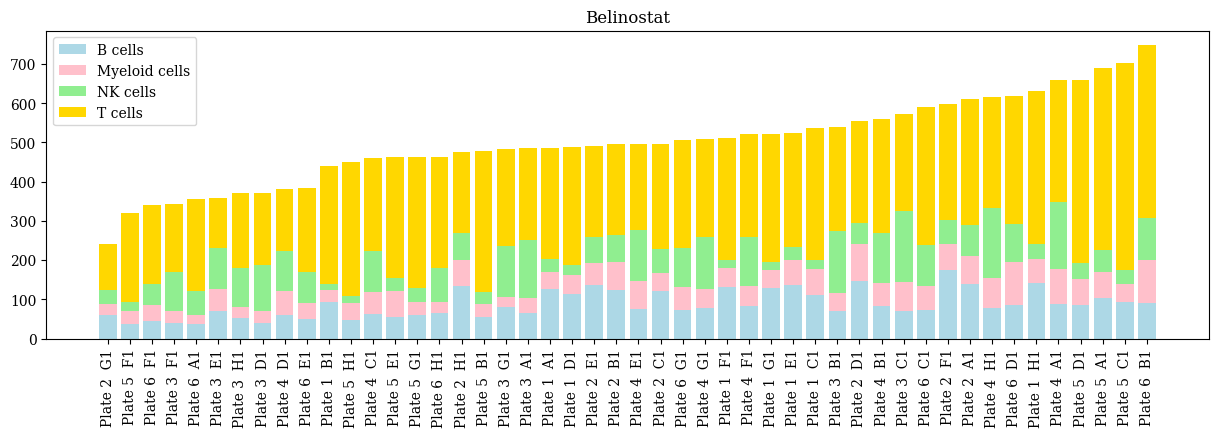
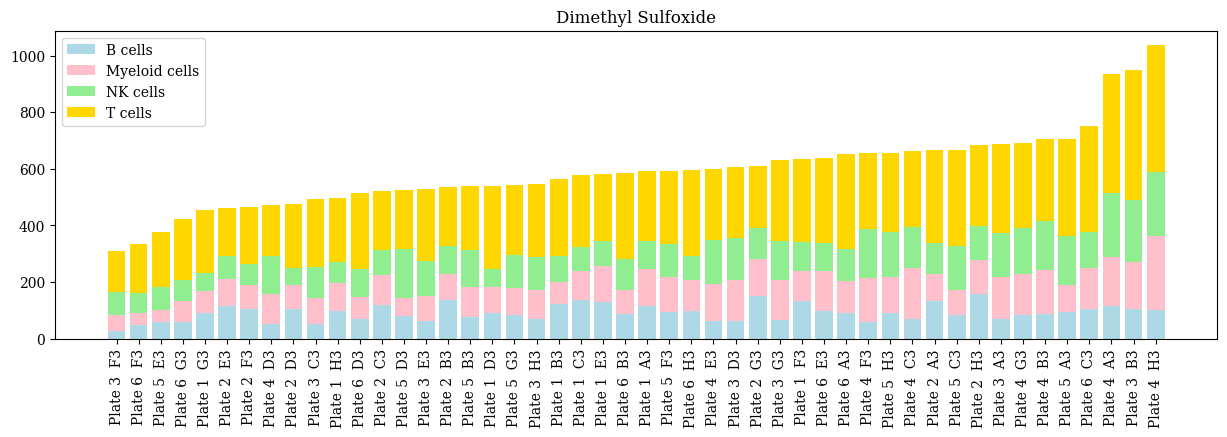

we observe fluntiation in the ratios of cell counts across different wells. However, we do not observe a notable pecularities. Next, we plot similar figures for non control compounds. Since we have one well per donor per compound, we plot all compounds for each donor. In order to keep the track of compounds across different donors, the order to compounds are similar on the x axis.Those in red are identified as outliers using IsolationForest of sklearn.  

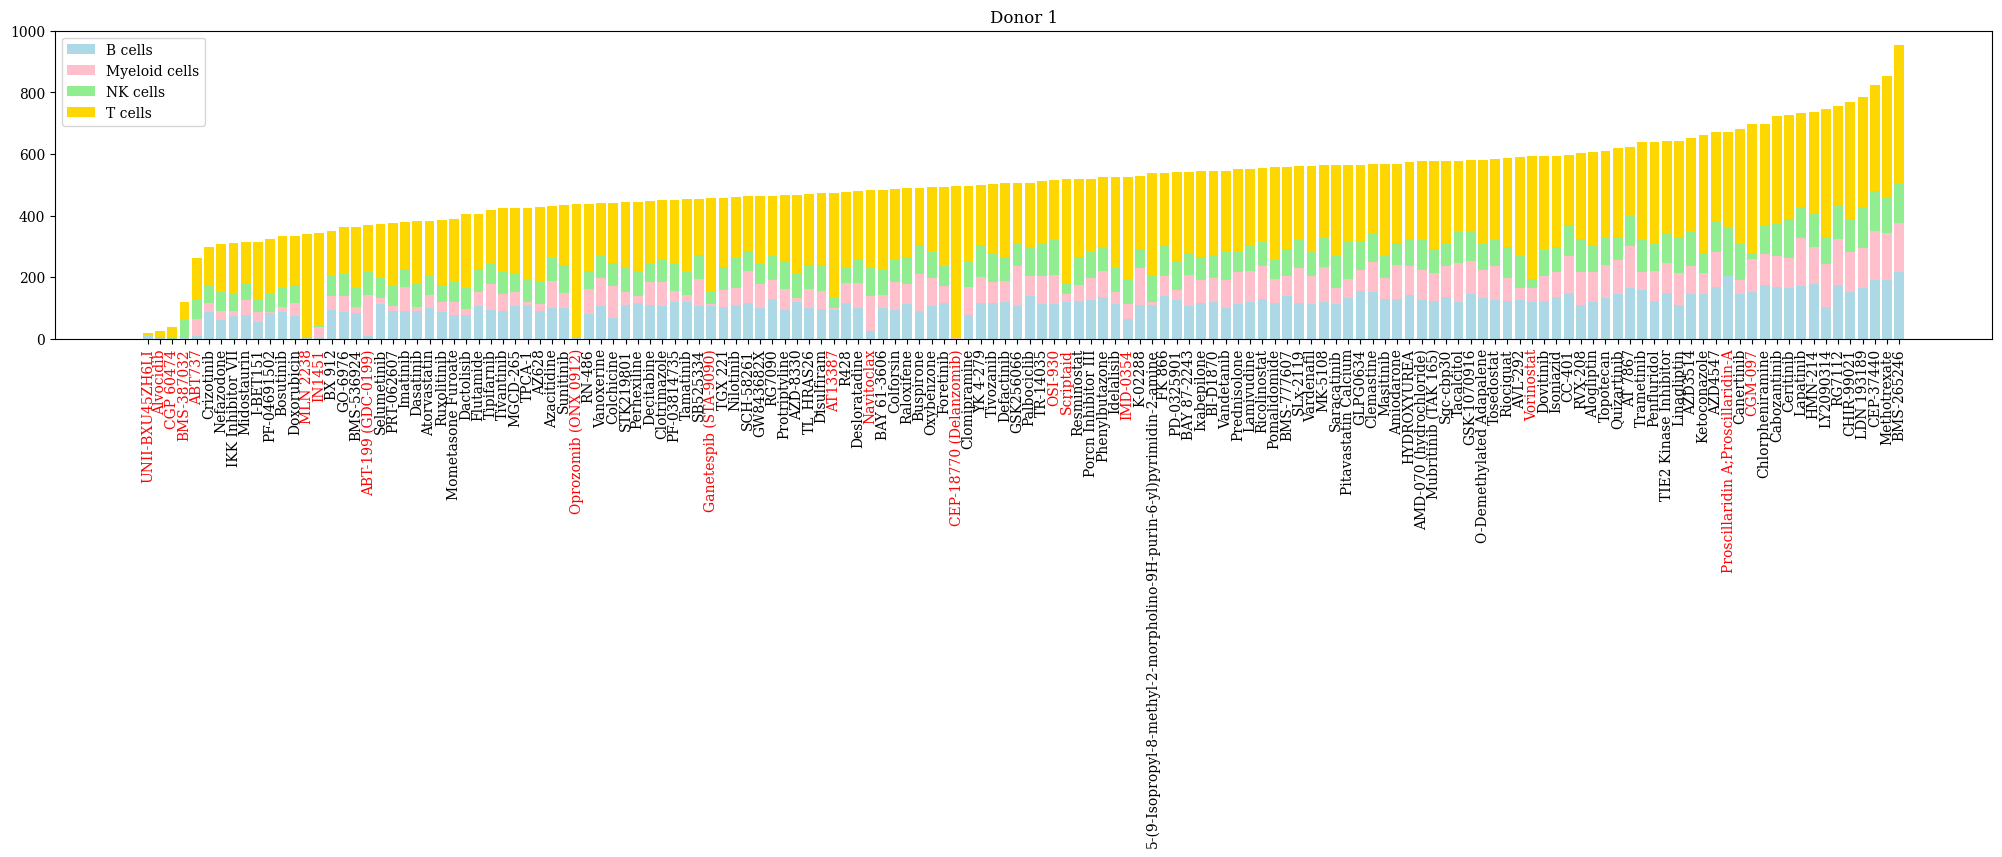
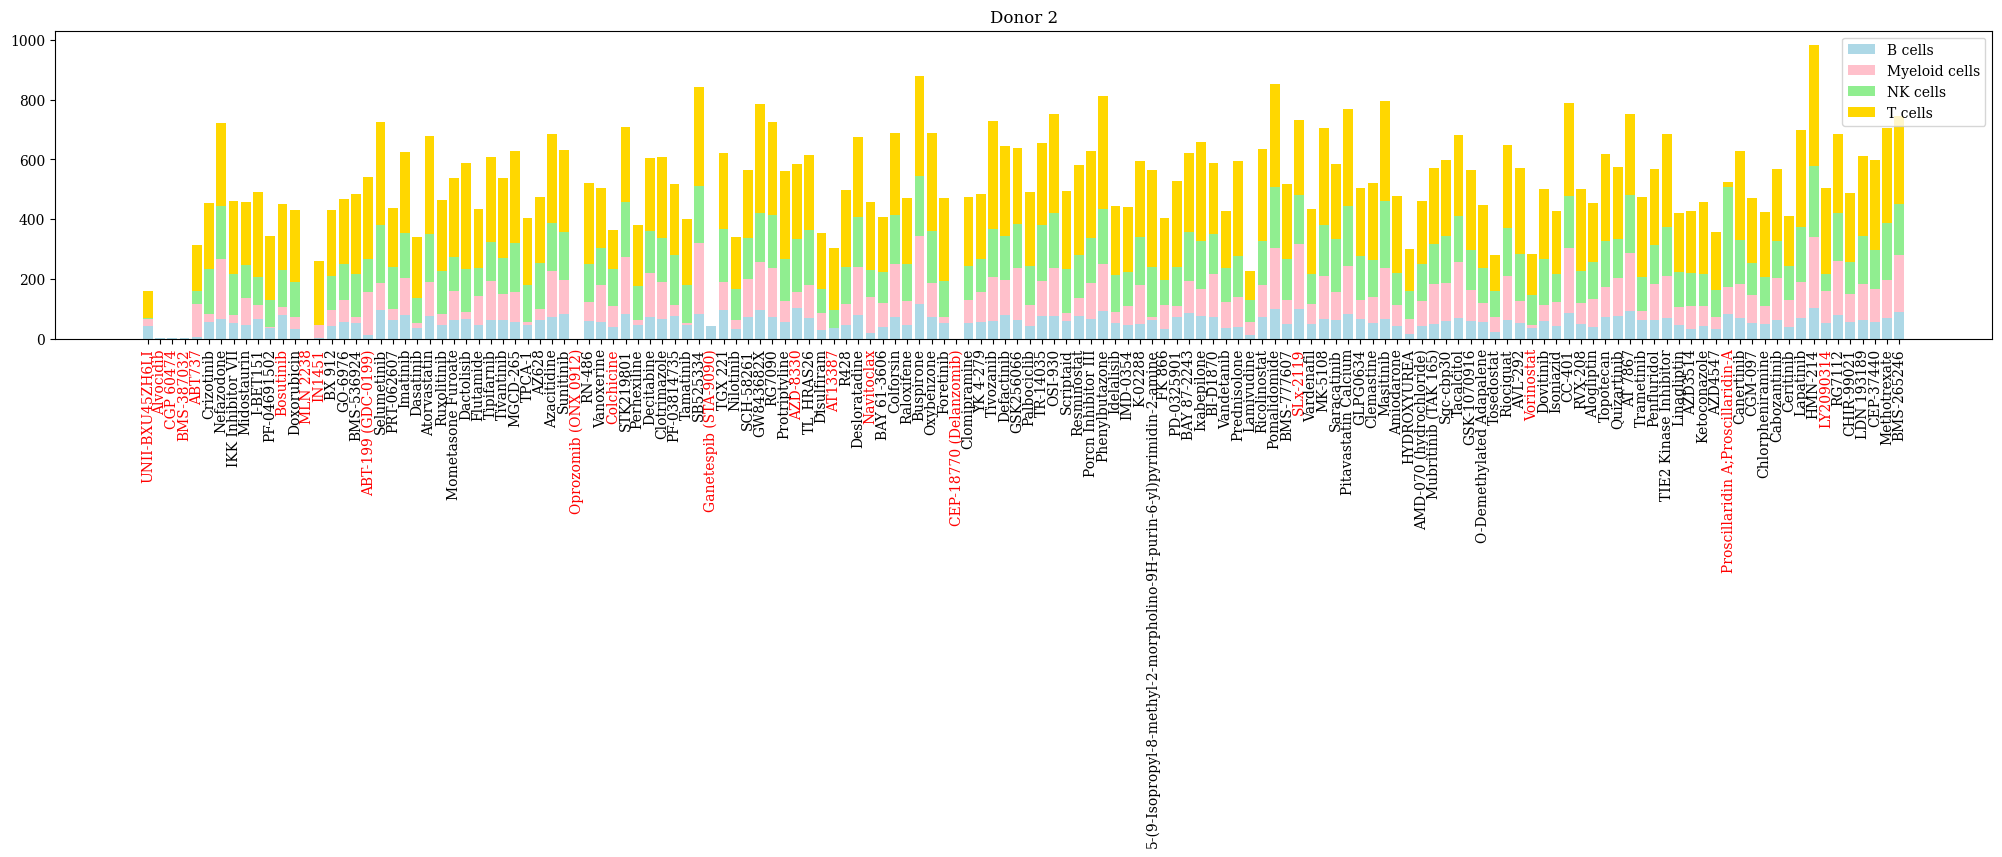
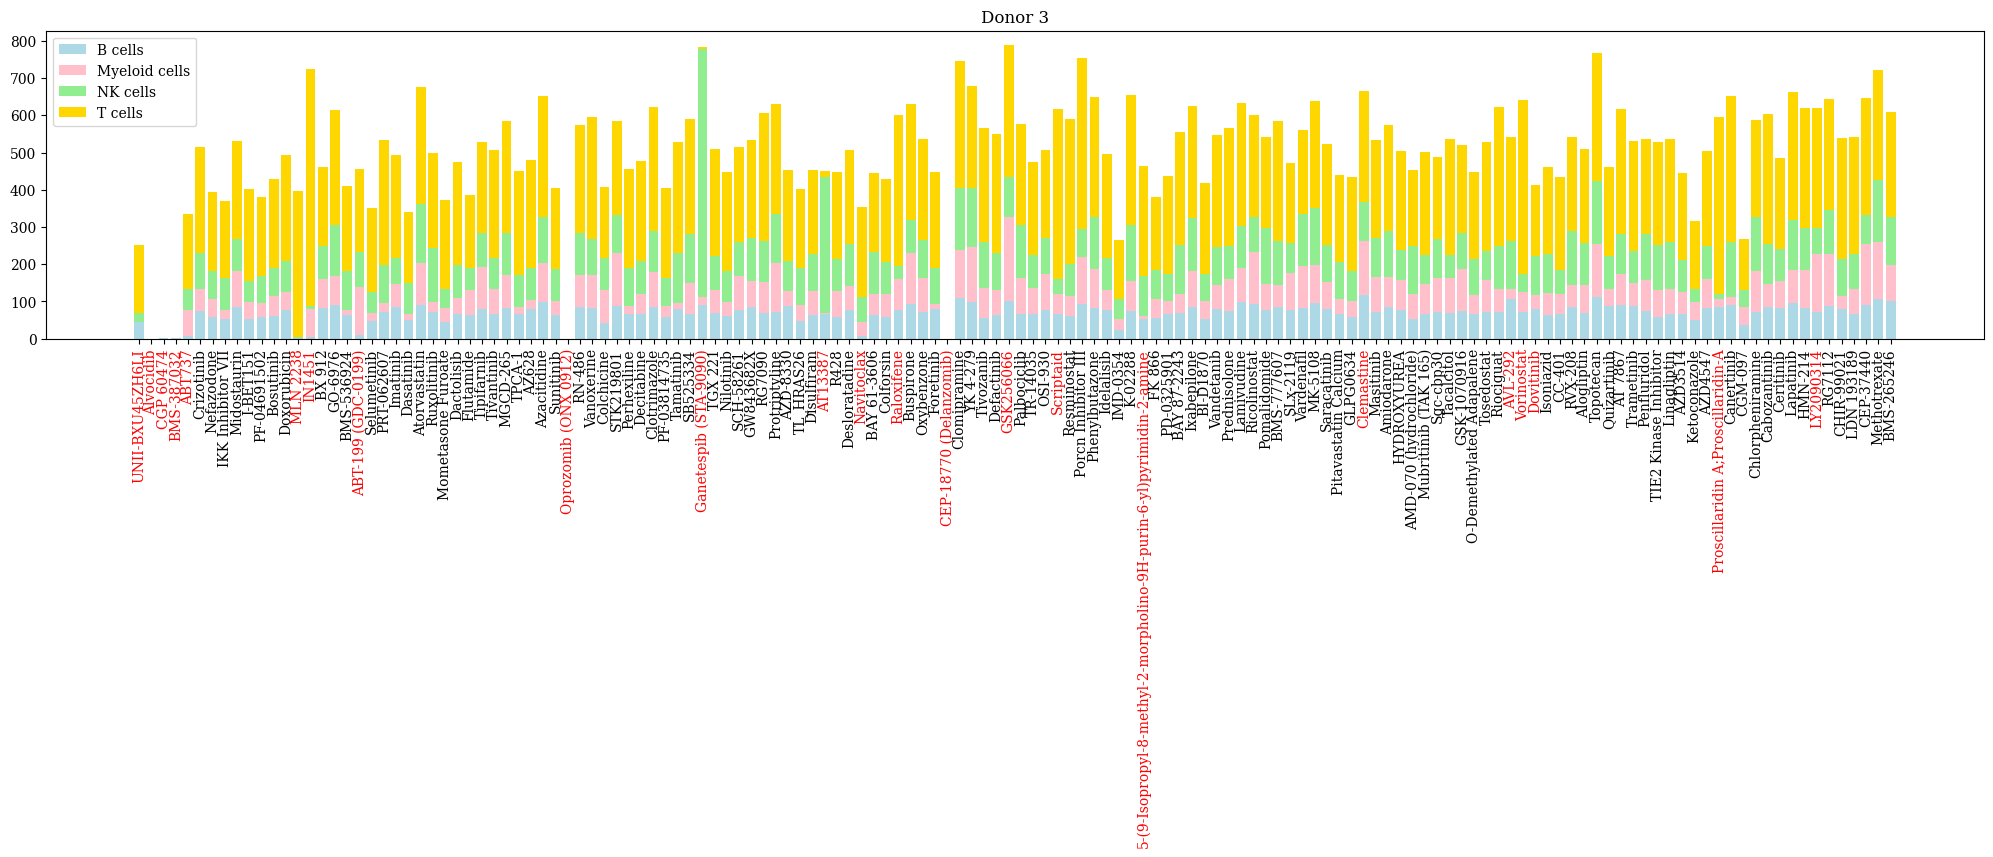

30 compounds were identified as outliers. 15 compounds are common across all three donors. among them, 'Alvocidib', 'CGP 60474' are very toxic. 'UNII-BXU45ZH6LI' is less toxic than the previous ones but still we see that it either killed all cell types of certain types. outliers1

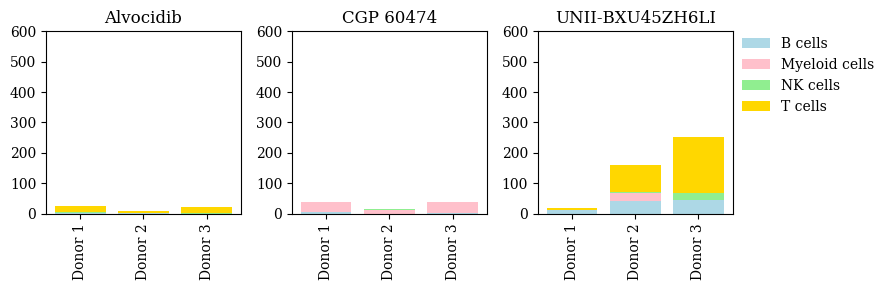

then, we have compounds that have converted all cells into one or two cells types. consideirng that we need at least three cell types to include a compound, these compounds should go. outliers2

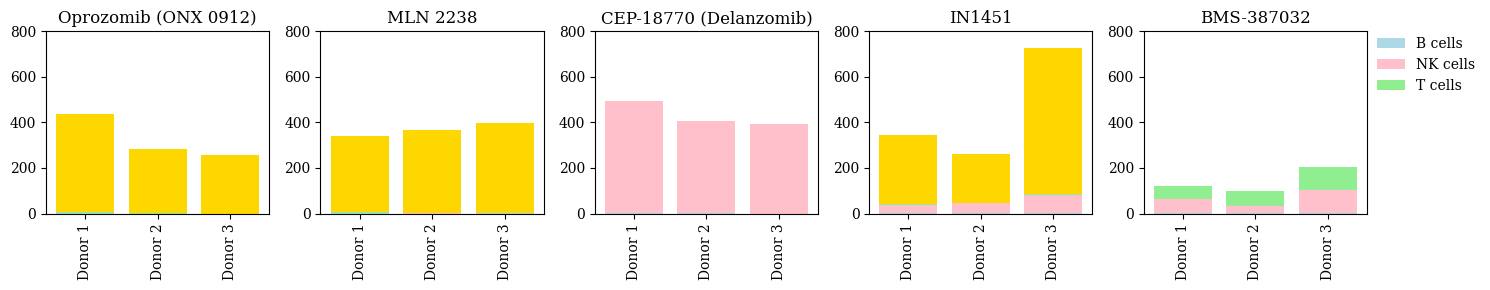

next, are the compounds that their action is not clear, as they have inconsistent effects across donors.outliers_3

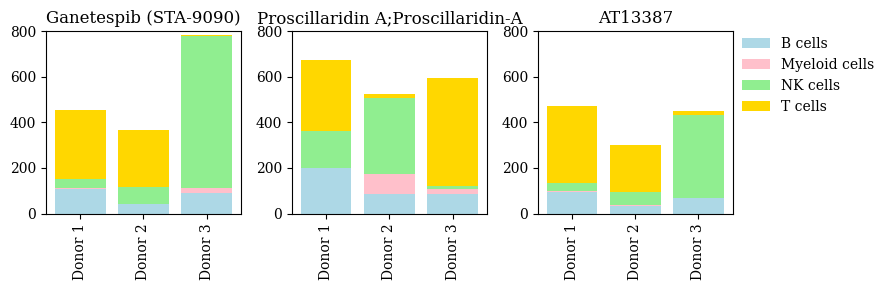

the remaning compounds that are less biased are:


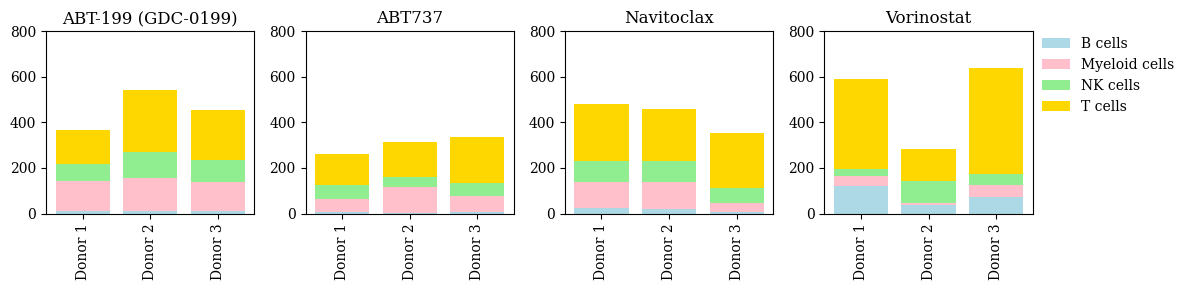

the rest of 30 compounds which are only problamatic in one donor are plotted below. they do not show a sever pecularities.

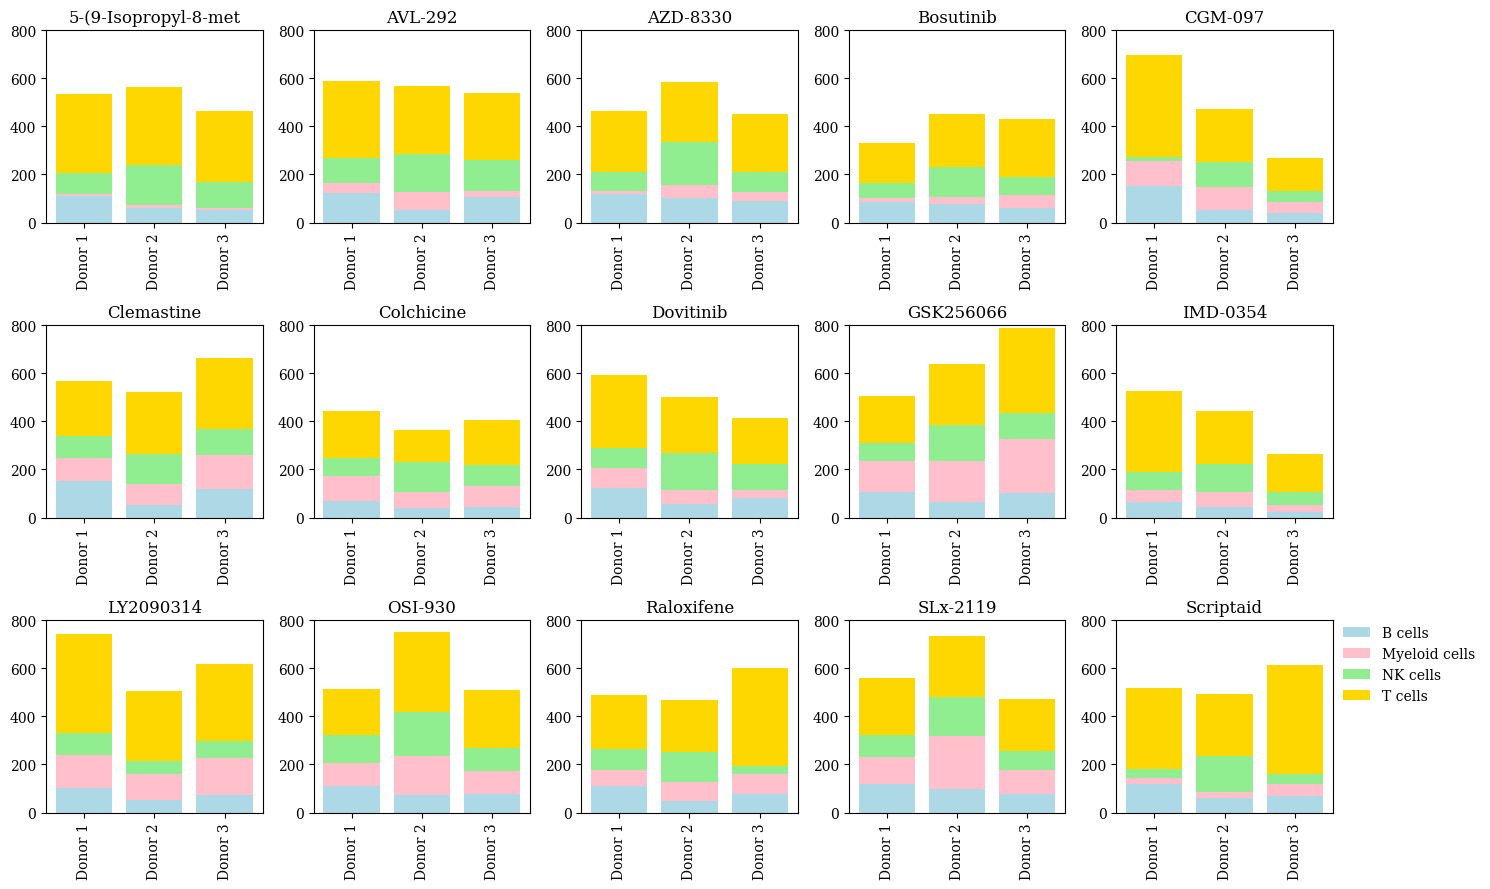

after filtering for outlier groups 1 to 3, we get the following. We see much less samples with low cell count, more even distribution of proportion of positive values around 0.5. 

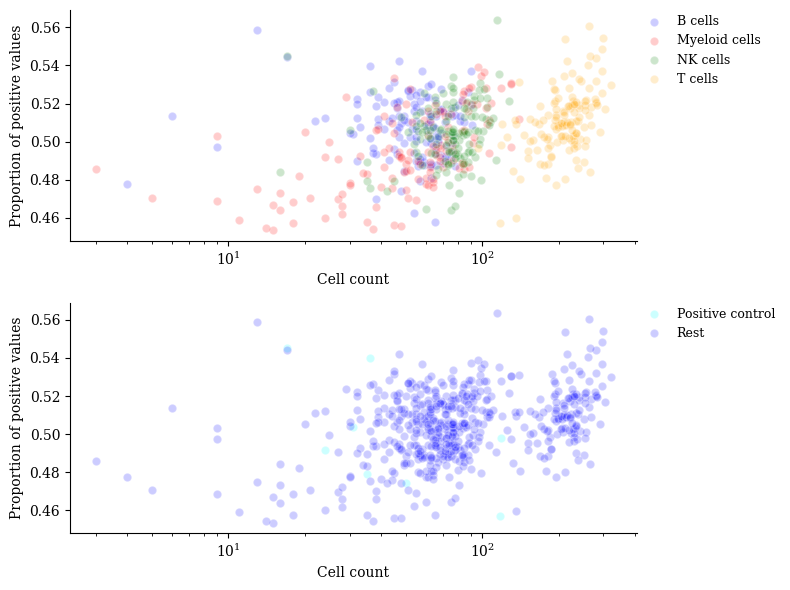
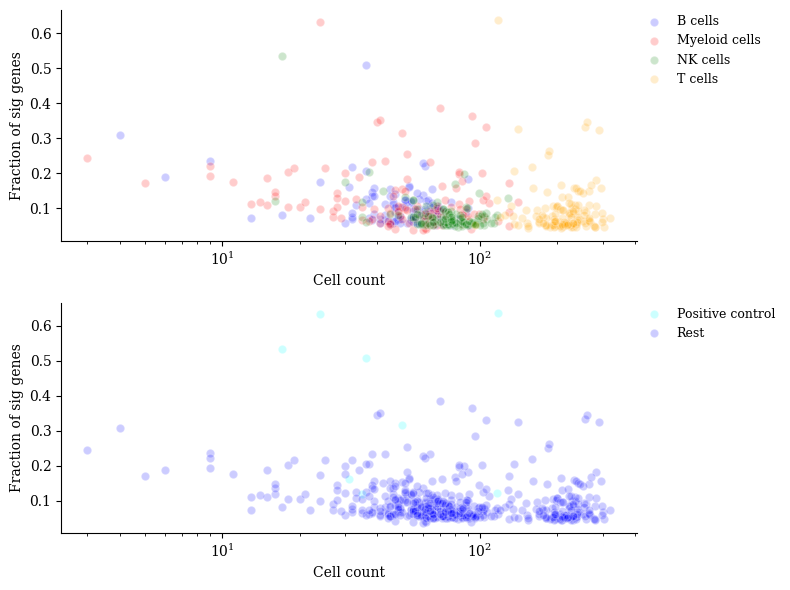

## Samples with low cell count

next, we look at the distribution of missingness again. 

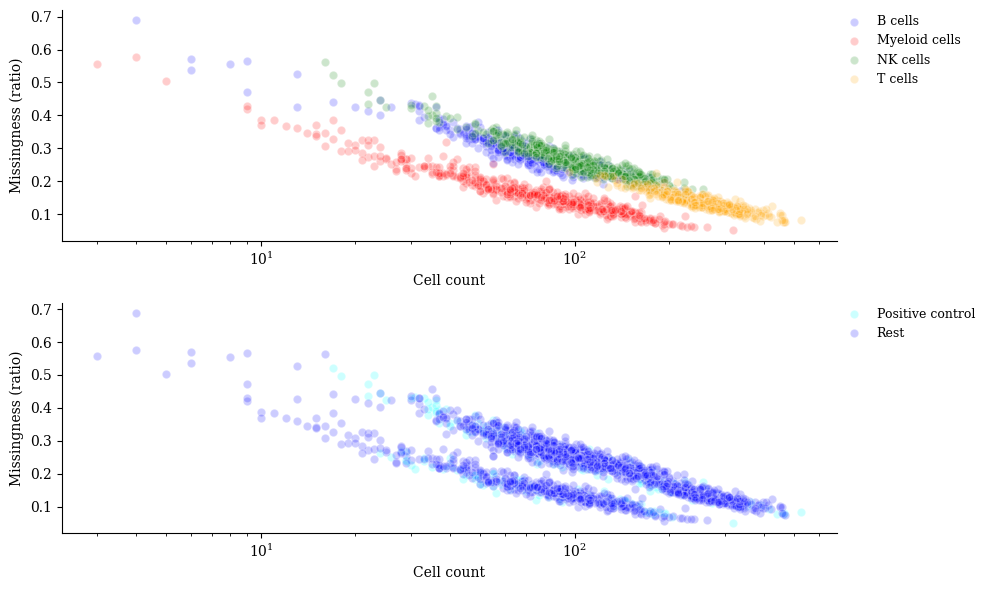

to improve missingness and mitigate the possible biases due to lower cell count, we remove those pseudobulked samples with less than 10 cells. there are 11 samples containing 7 compounds and two cells types of myeloid cells and b cells. The number of donors associated with each compound cell type is given below.  

In [1]:
5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-6-yl)pyrimidin-2-amine  B cells          0
                                                                      Myeloid cells    1
ABT737                                                                B cells          3
                                                                      Myeloid cells    0
ABT-199 (GDC-0199)                                                    B cells          2
                                                                      Myeloid cells    0
Navitoclax                                                            B cells          1
                                                                      Myeloid cells    0
PF-04691502                                                           B cells          0
                                                                      Myeloid cells    2
Tamatinib                                                             B cells          0
                                                                      Myeloid cells    1
Vorinostat                                                            B cells          0
                                                                      Myeloid cells    1

in addition to removing the 11 samples, additional 2 samples need to be removed because there is only 1 donor left for the given compound-cell type pair which would make the DE analysis underdetermined. All together this filtering removes 15 samples with 3 compound-celltype being removed from the final DE results while no compound being removed. number of pseudobulked samples for each compound-cell type:

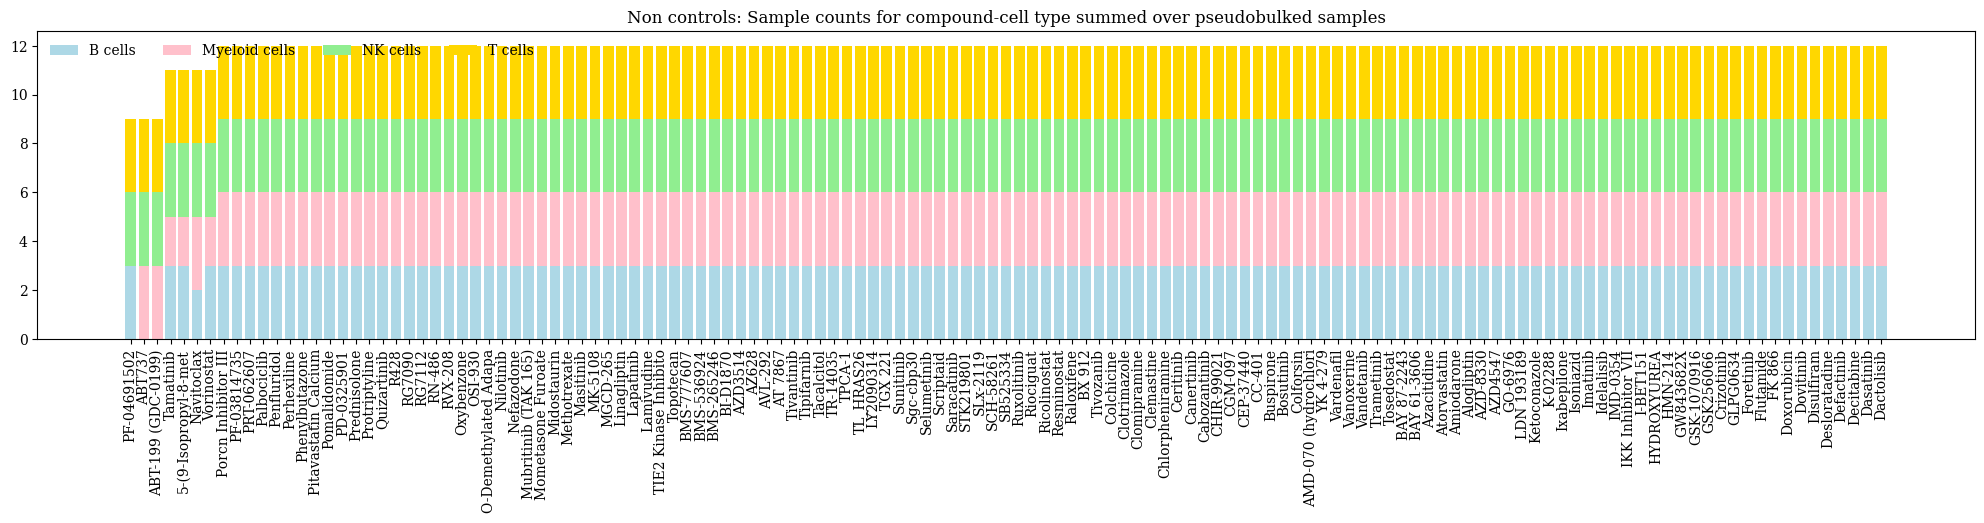

## Genes with low coverage

in addition, we filter out those genes that are absent in majority of samples. by setting a threshold of 0.5 (missing in half of samples), 3150 genes are removed. 

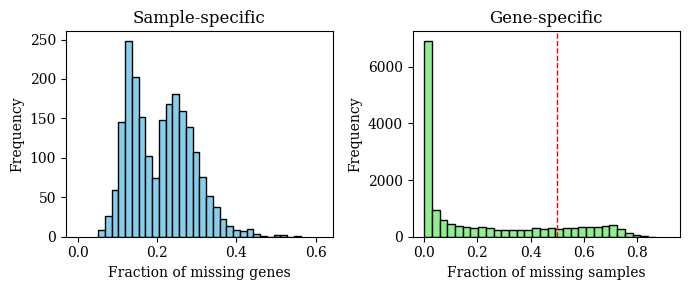

after filtering for samples with low cell count and genes with low coverage, we get:

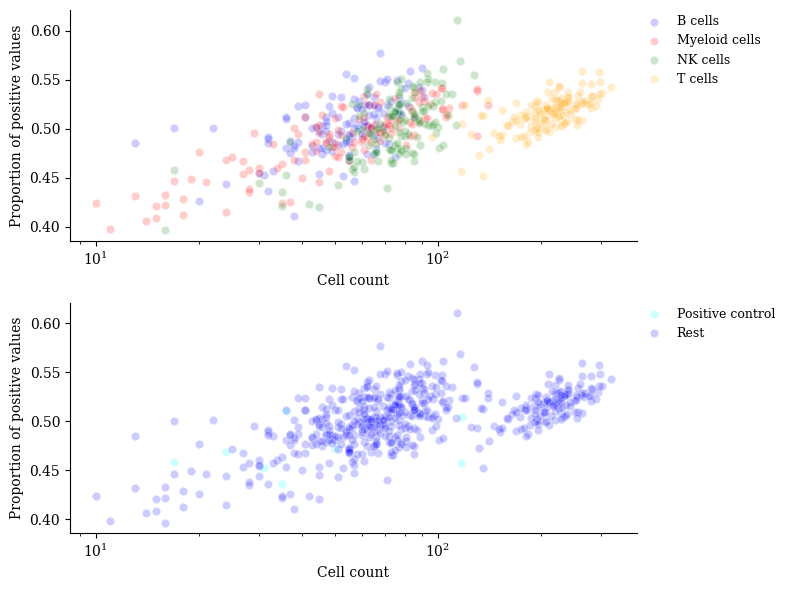
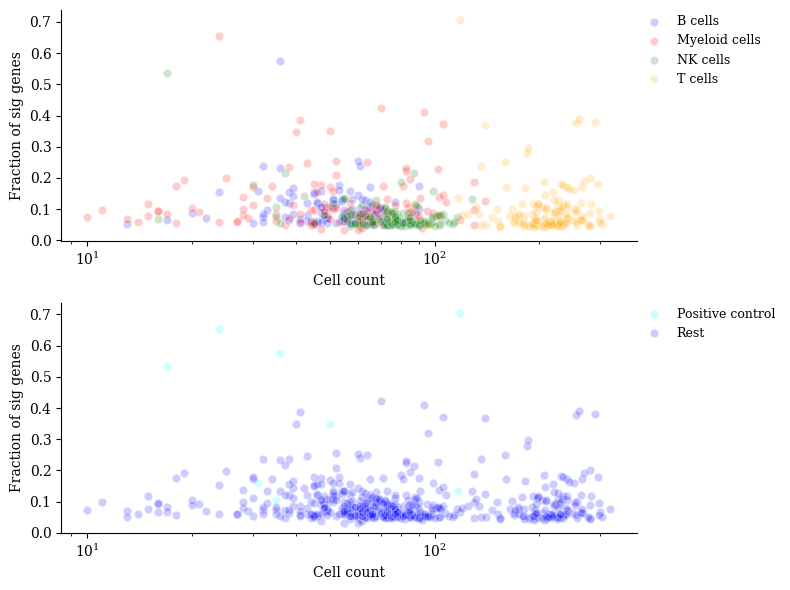

## Summary 
- Merging T cells: in this step, we do not loose data per say. However, the number of pseudobulked samples and the resulting de_train shrink in size as we have 4 cell types instead of original 6. 
- Outlier compounds: in this step. we remove 11 compounds from the pseudobulked data, translating to 44 (11 compounds * 4 cell types) samples from the de_train.
- Low cell count: in this step, we remove 13 samples from the pseudobulked data, translating to 7 samples from the de_train
- Low coverage genes: in this step, we remove around 3000 genes with low coverage. No samples are removed. 

the pseudobulked data after filtering contains 2159 samples, 12794 genes, 135 compounds (excluding negative control), and 4 cell types. The de-train as 537 samples. By partitioning the data to train and test (10 percent of compounds exclusively in train set), the train set has around 300 samples, where the test set has 240 samples. 



# QC in single-cell level
for cell-wise filtering, we only apply filtering on percent_hb by removing >.2. This results in removal of 20 single cells. These cells were scattered across different compounds, cell_types, donors, plates, etc.

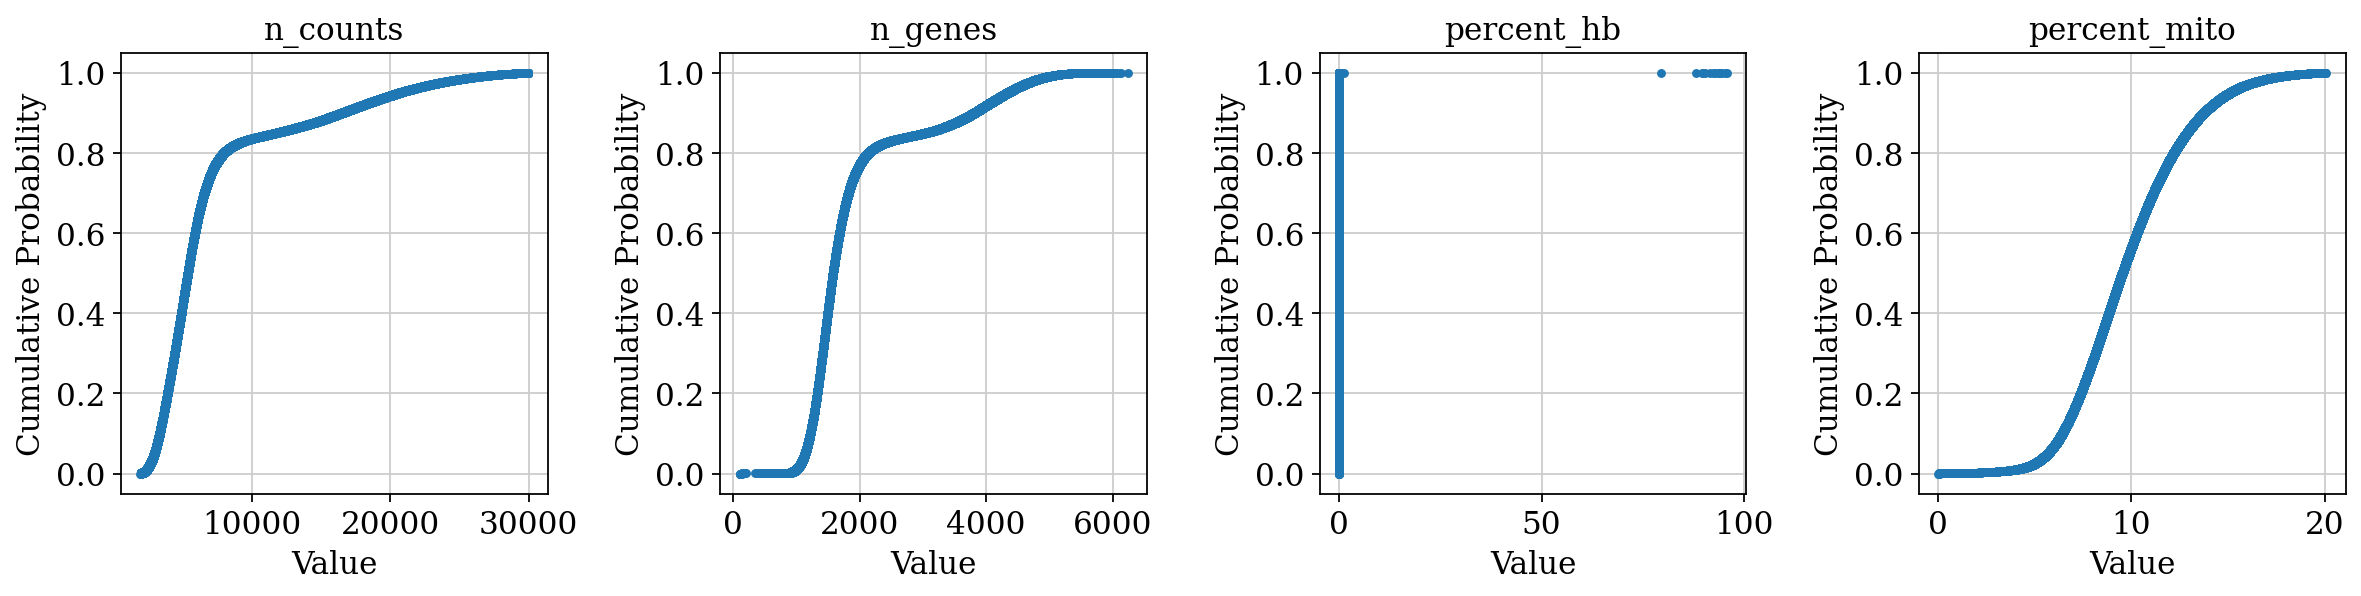

for gene-wise, we keep genes that were present in at least 100 cells per plate.